MAJOR LEAGUES

Project Description - Setting up the github repository using soccer spi dataset. After comes the part of loading the dataset using pandas as it is in csv format. Performed feature engineering and exploratory data analysis to get better insights of the dataset. Since I can see that some of the features are co-related so I decide to build two models in order to test my hypothesis that do highly corelated features affect the model perfomance and if they do upto what extent. I have used matplotlib and searborn libraray for visualization and concluding the results.

Dataset link:https://github.com/fivethirtyeight/data/tree/master/soccer-spi

Changing the directory to the required dataset

In [6]:
cd project4/

/Users/danaalmansour/Desktop/project4


In [7]:
ls

spi_matches.csv


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [8]:
match = pd.read_csv('spi_matches.csv')# Loading spi_matches.csv file

To look for the data types of various features.

In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42174 entries, 0 to 42173
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       42174 non-null  int64  
 1   date         42174 non-null  object 
 2   league_id    42174 non-null  int64  
 3   league       42174 non-null  object 
 4   team1        42174 non-null  object 
 5   team2        42174 non-null  object 
 6   spi1         42174 non-null  float64
 7   spi2         42174 non-null  float64
 8   prob1        42174 non-null  float64
 9   prob2        42174 non-null  float64
 10  probtie      42174 non-null  float64
 11  proj_score1  42174 non-null  float64
 12  proj_score2  42174 non-null  float64
 13  importance1  29819 non-null  float64
 14  importance2  29819 non-null  float64
 15  score1       34517 non-null  float64
 16  score2       34517 non-null  float64
 17  xg1          18387 non-null  float64
 18  xg2          18387 non-null  float64
 19  nsxg

In [10]:
match.head(5)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


From the table above, league, team1 and team2 are of type object and as for the remaining columns are of type numeric. Firstly, I will be converting object type to numeric type using label encoder to create unique number of each team1 and team2 value and store it in team1_up and team2_up. secondly, I will delete team1, team2 and league columns which are of type object. Since I already have its numeric version league_i, I will delete league. After that, I will be checking for null values

In [11]:
labelencoder = LabelEncoder()
match['team1_up'] = labelencoder.fit_transform(match['team1'])
match[['team1_up', 'team1']].sample(4)
match['team2_up'] = labelencoder.fit_transform(match['team2'])
match[['team2_up', 'team2']].sample(4)
match = match.drop(['team1','team2','league'], axis = 1)
match.isnull().sum()
match.dropna(inplace=True)
match.isnull().sum()

season         0
date           0
league_id      0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
team1_up       0
team2_up       0
dtype: int64

In [12]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16520 entries, 10 to 35114
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       16520 non-null  int64  
 1   date         16520 non-null  object 
 2   league_id    16520 non-null  int64  
 3   spi1         16520 non-null  float64
 4   spi2         16520 non-null  float64
 5   prob1        16520 non-null  float64
 6   prob2        16520 non-null  float64
 7   probtie      16520 non-null  float64
 8   proj_score1  16520 non-null  float64
 9   proj_score2  16520 non-null  float64
 10  importance1  16520 non-null  float64
 11  importance2  16520 non-null  float64
 12  score1       16520 non-null  float64
 13  score2       16520 non-null  float64
 14  xg1          16520 non-null  float64
 15  xg2          16520 non-null  float64
 16  nsxg1        16520 non-null  float64
 17  nsxg2        16520 non-null  float64
 18  adj_score1   16520 non-null  float64
 19  adj

I can see above that there are no null values. the same for the object datatype other than date.

EXPLORATORY ANALYSIS- In order to predict score1 and score2 by using other columns, I will begin with plotting correlation matrix for each columns with score1 and score2 

In [13]:
correlation = match.corr()
print(correlation['score1'])
print()
print(correlation['score2'])

season        -0.018872
league_id     -0.055566
spi1           0.151713
spi2          -0.100267
prob1          0.330102
prob2         -0.292107
probtie       -0.225630
proj_score1    0.346274
proj_score2   -0.233113
importance1    0.089863
importance2   -0.048705
score1         1.000000
score2        -0.057401
xg1            0.561131
xg2           -0.088717
nsxg1          0.222531
nsxg2         -0.062683
adj_score1     0.990718
adj_score2    -0.035856
team1_up      -0.009996
team2_up       0.017518
Name: score1, dtype: float64

season         0.012833
league_id     -0.040723
spi1          -0.067181
spi2           0.155860
prob1         -0.268937
prob2          0.299454
probtie        0.002052
proj_score1   -0.189698
proj_score2    0.308550
importance1   -0.051492
importance2    0.075997
score1        -0.057401
score2         1.000000
xg1           -0.066504
xg2            0.577835
nsxg1         -0.024206
nsxg2          0.246799
adj_score1    -0.030696
adj_score2     0.992841
team1_up  

Plotting heatmap for visualization of correlation among features.

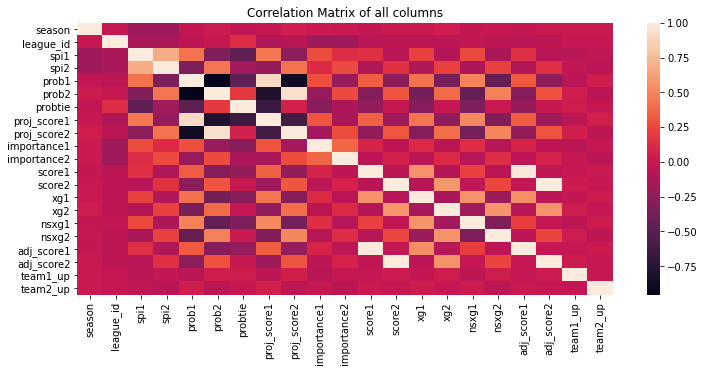

In [14]:
figure_corr = plt.figure(figsize=(12,5))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)
plt.title("Correlation Matrix of all columns")
plt.show()

The figure above shows that dj_score and xg is highly correlate to respective score. 

I displayied the data distribution of score1 and score2. The plots below show that most of the time score will be in 0,1 or 2 for both team.

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

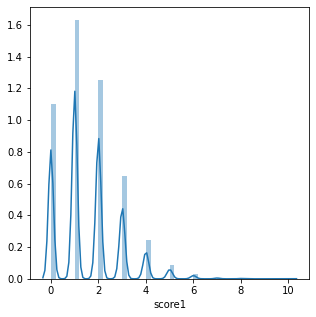

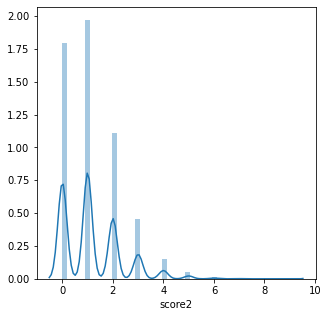

In [15]:
plt.figure(figsize=(5,5))
sns.distplot(match['score1'])
plt.figure(figsize=(5,5))
sns.distplot(match['score2'])

FEATURE ENGINEERING- For this step, I will be deleting date and just keeping month and year into account. I will split the date object and create three new columns: Year, Month and Day. And then, I deleted 'date' and 'day'

In [16]:
months_year = lambda x: pd.Series([x['date'].split("-")[0], x['date'].split("-")[1], x['date'].split("-")[-1]])
match[["Year", "Month", "Day"]] = match.apply(months_year, axis=1)
match.info()
del match["date"]
del match["Day"]
match['Year'] = match['Year'].astype(int) 
match['Month'] = match['Year'].astype(int)
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16520 entries, 10 to 35114
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       16520 non-null  int64  
 1   date         16520 non-null  object 
 2   league_id    16520 non-null  int64  
 3   spi1         16520 non-null  float64
 4   spi2         16520 non-null  float64
 5   prob1        16520 non-null  float64
 6   prob2        16520 non-null  float64
 7   probtie      16520 non-null  float64
 8   proj_score1  16520 non-null  float64
 9   proj_score2  16520 non-null  float64
 10  importance1  16520 non-null  float64
 11  importance2  16520 non-null  float64
 12  score1       16520 non-null  float64
 13  score2       16520 non-null  float64
 14  xg1          16520 non-null  float64
 15  xg2          16520 non-null  float64
 16  nsxg1        16520 non-null  float64
 17  nsxg2        16520 non-null  float64
 18  adj_score1   16520 non-null  float64
 19  adj

I have now analyzed our every feature data type, and pre-processed the data. Then, I will plot the relation of each and every columns with score1 and score2.

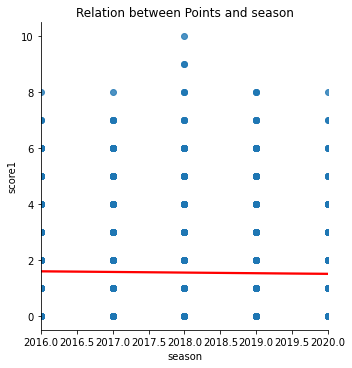

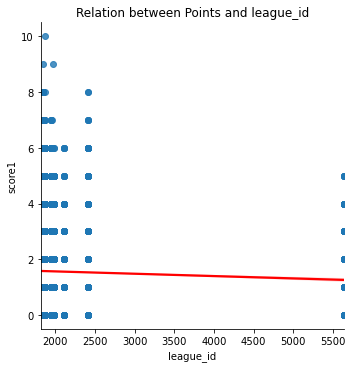

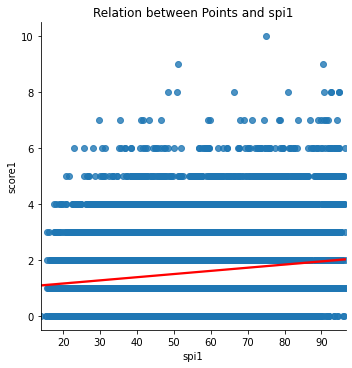

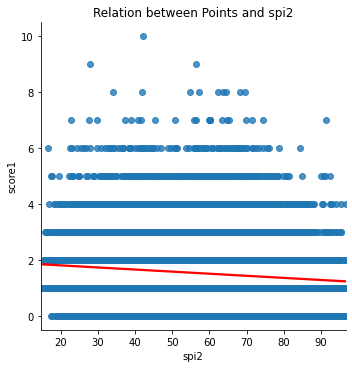

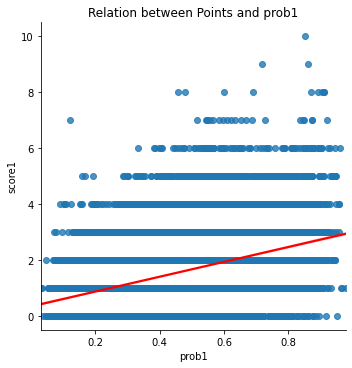

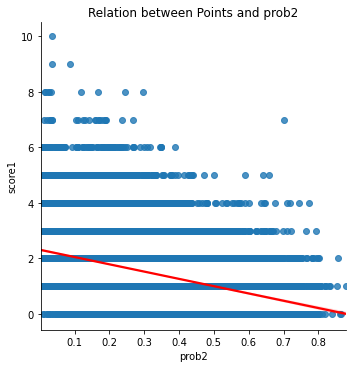

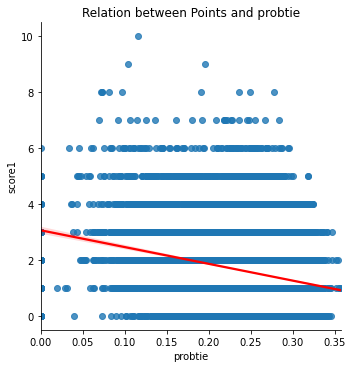

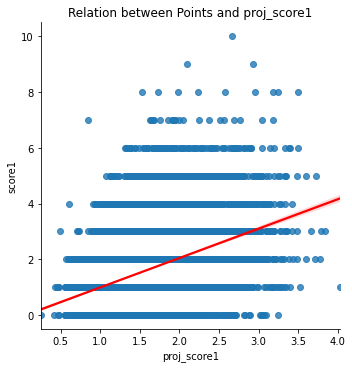

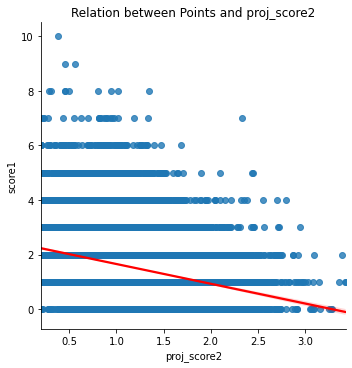

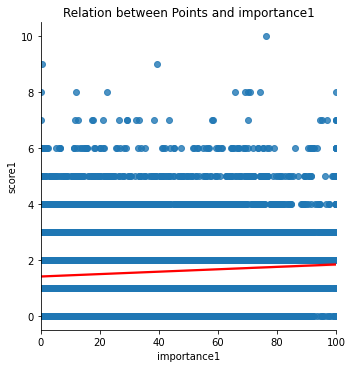

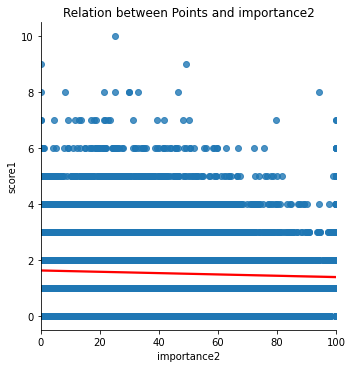

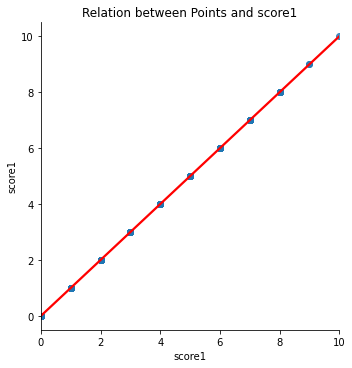

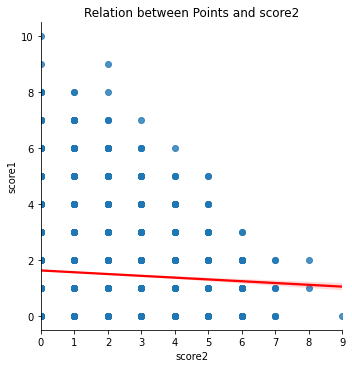

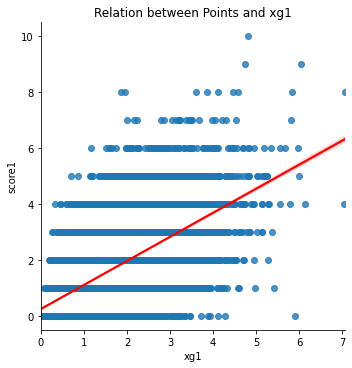

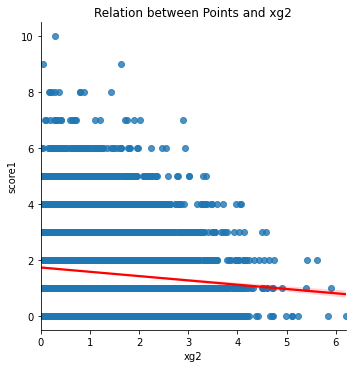

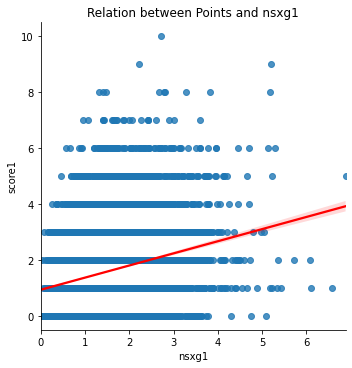

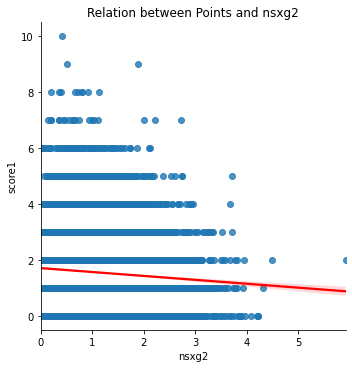

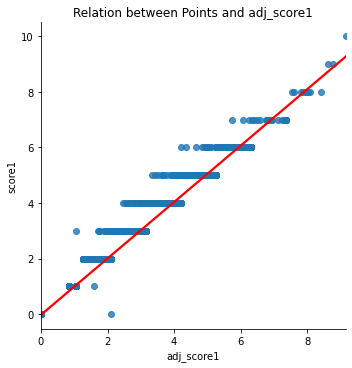

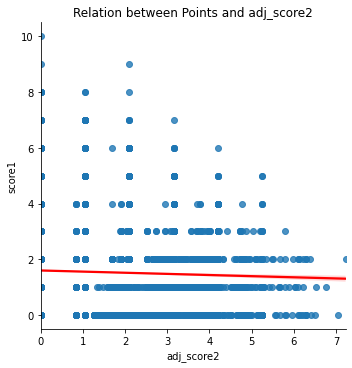

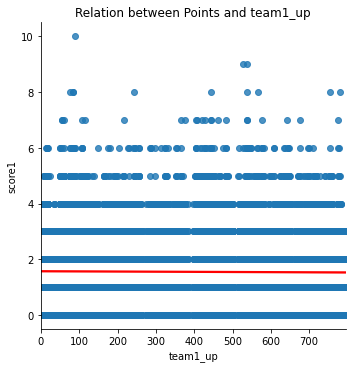

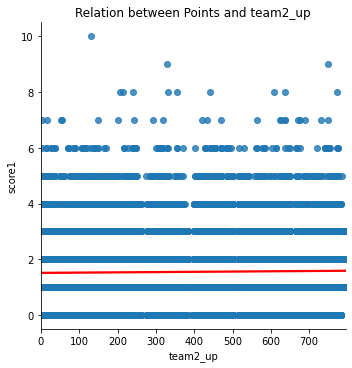

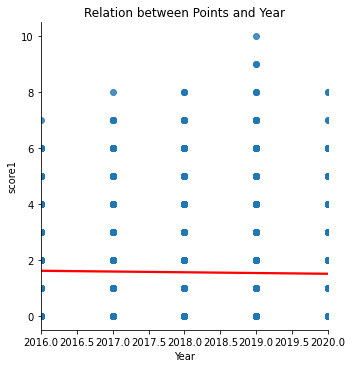

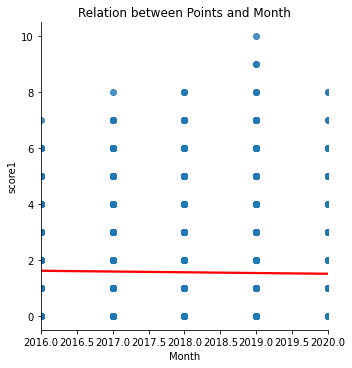

In [17]:
features=match.columns
for i in features:
    sns.lmplot(x=i, y="score1", data=match, line_kws={'color': 'red'})
    text="Relation between Points and " + i 
    plt.title(text)
    plt.show()

lmplot is used for plotting the data and regression model which fits across a FacetGrid

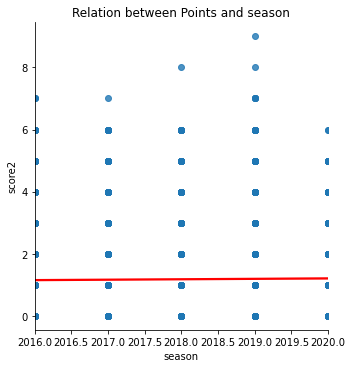

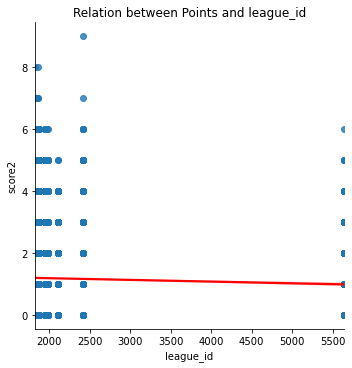

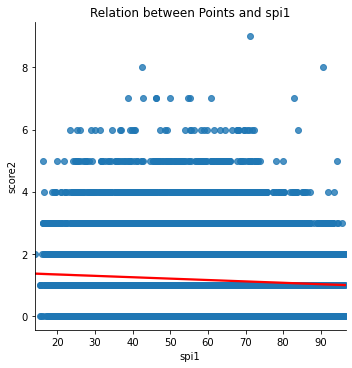

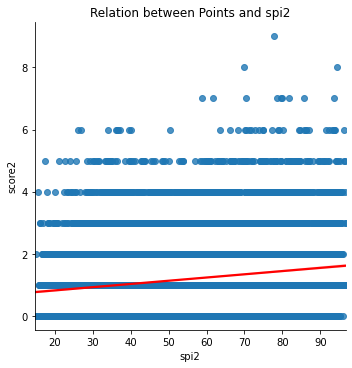

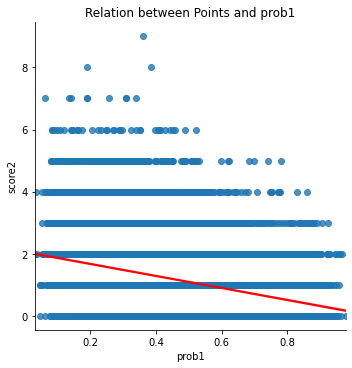

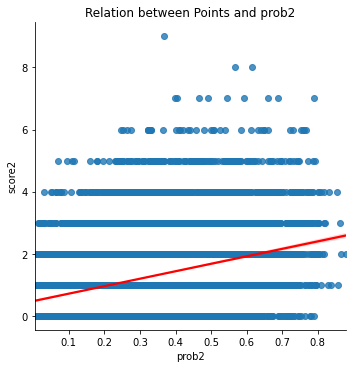

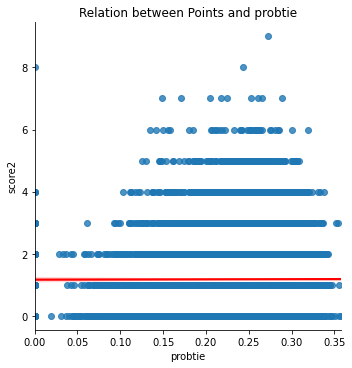

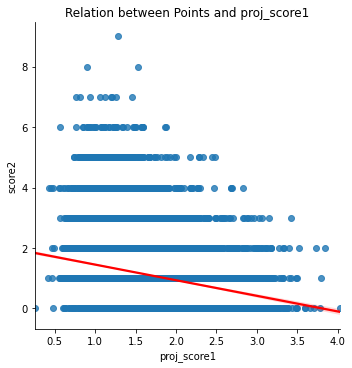

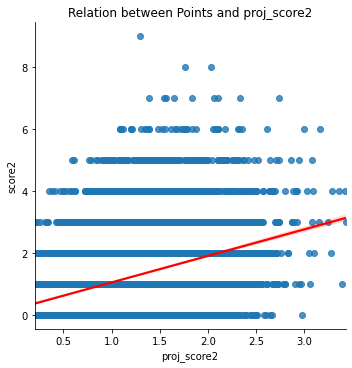

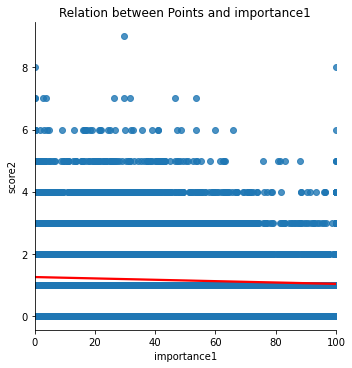

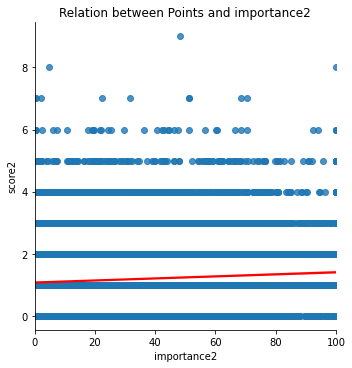

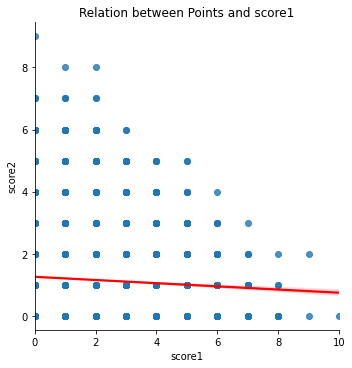

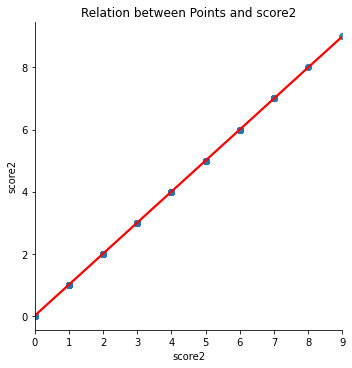

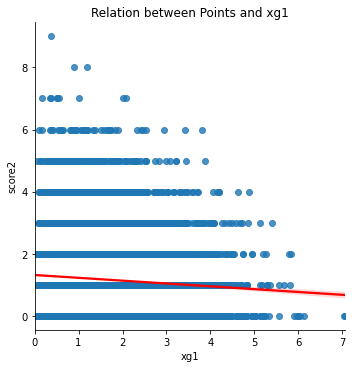

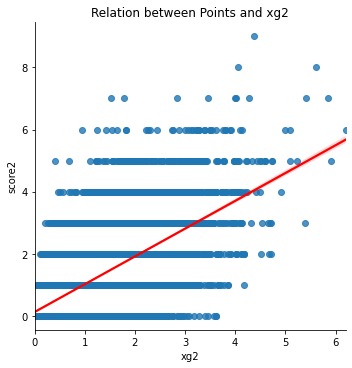

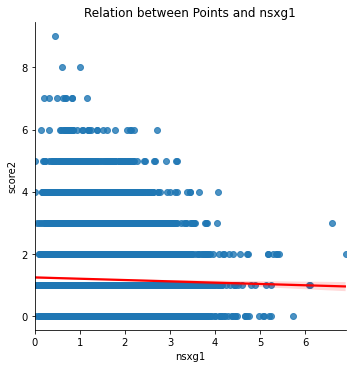

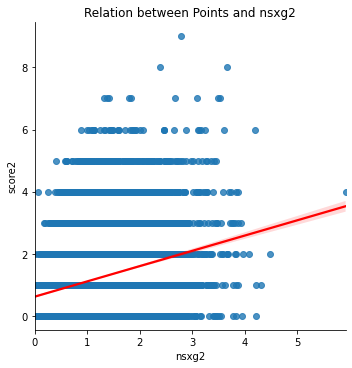

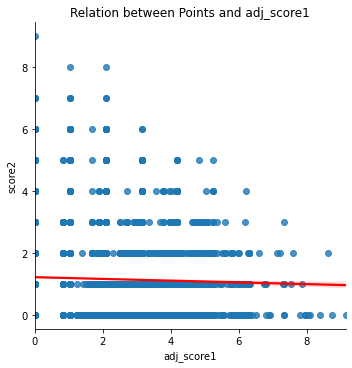

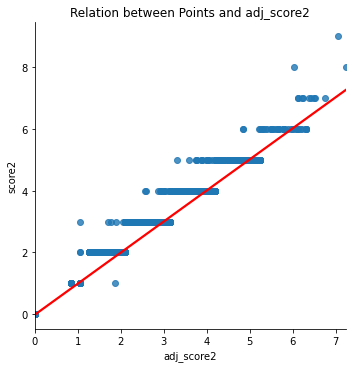

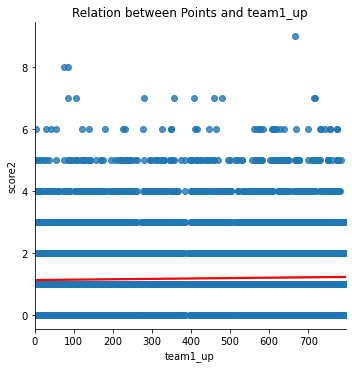

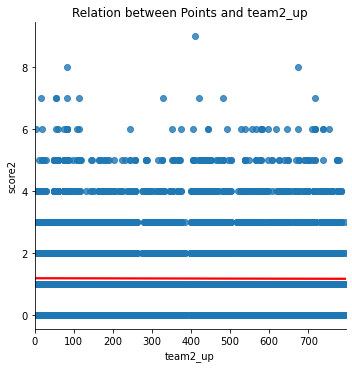

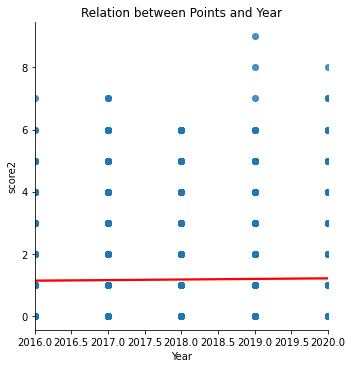

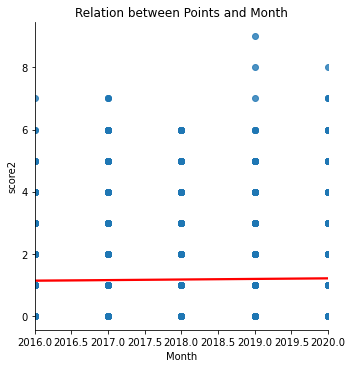

In [18]:
features=match.columns
for i in features:
    sns.lmplot(x=i, y="score2", data=match, line_kws={'color': 'red'})
    text="Relation between Points and " + i 
    plt.title(text)
    plt.show()

REGRESSION- Firstly, I will use all columns in regression and check the errors. Then, only highly co-related and un-correlated columns will be used for regression. After that, I will compare both results.

splitting the dataset in train and test by dropping score1 and score2 columns and putting them to y_score1 and y_score2.

In [19]:
#this is using all columns 
X = match.drop(columns = ['score1', 'score2'])
y_score1 = match.score1
y_score2 = match.score2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_score1, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_score2, random_state=1)

Now, I will define linear regression model and apply it to the train and test dataset.

In [20]:
model_score1 = linear_model.LinearRegression()
model_score2 = linear_model.LinearRegression()

In [21]:
model_score1.fit(X1_train, y1_train)
model_score2.fit(X2_train, y2_train)

LinearRegression()

In [22]:
Score1Predict_train = model_score1.predict(X1_train)
Score1Predict_test = model_score1.predict(X1_test)
Score2Predict_train = model_score2.predict(X2_train)
Score2Predict_test = model_score2.predict(X2_test)

This code below is for is used in order to compare the actual value with predicted value. A plot graph is provided for visualization purposes.

In [23]:
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': Score1Predict_test.flatten()})
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': Score2Predict_test.flatten()})

In [24]:
print(f"For Score1:\n\n{df1.tail(10)}")
print()
print(f"For Score2:\n\n{df2.tail(10)}")

For Score1:

       Actual  Predicted
7783      2.0   2.068572
13112     0.0  -0.032838
28722     1.0   1.050999
26353     2.0   2.054273
15746     3.0   2.913025
25834     0.0   0.020758
1112      2.0   2.078392
31520     3.0   2.543749
29716     1.0   1.081662
18580     1.0   1.008381

For Score2:

       Actual  Predicted
7783      1.0   1.030699
13112     0.0   0.020549
28722     1.0   1.028264
26353     2.0   2.085199
15746     0.0  -0.035750
25834     0.0  -0.000876
1112      1.0   1.020012
31520     1.0   1.020365
29716     0.0  -0.012224
18580     2.0   2.072753


Plotting bar plot for comparing the results.

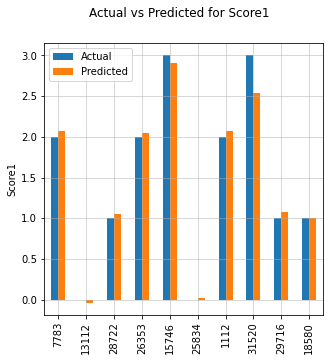

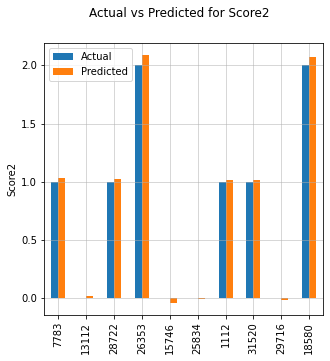

In [25]:
df1.tail(10).plot(kind='bar',figsize=(5, 5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.ylabel('Score1')
plt.suptitle('Actual vs Predicted for Score1')
plt.show()

df2.tail(10).plot(kind='bar',figsize=(5, 5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.ylabel('Score2')
plt.suptitle('Actual vs Predicted for Score2')
plt.show()

Below is the error rate while using all columns as features.

In [26]:
mse= metrics.mean_absolute_error(y1_test, Score1Predict_test)
print("Score1:- ........................")
print("Mean Absolute Error: ")
print(mse)
msse = metrics.mean_squared_error(y1_test, Score1Predict_test)
print("Mean Squared Error:")
print(msse)
smsse = metrics.mean_squared_error(y1_test, Score1Predict_test)
print("Root Mean Squared Error:")
print(msse)

print("Score2:-...................................")
mse= metrics.mean_absolute_error(y2_test, Score2Predict_test)
print("Mean Absolute Error: ")
print(mse)
msse = metrics.mean_squared_error(y2_test, Score2Predict_test)
print("Mean Squared Error:")
print(msse)
smsse = metrics.mean_squared_error(y2_test, Score2Predict_test)
print("Root Mean Squared Error:")
print(msse)

Score1:- ........................
Mean Absolute Error: 
0.10629880424093878
Mean Squared Error:
0.027921931443017283
Root Mean Squared Error:
0.027921931443017283
Score2:-...................................
Mean Absolute Error: 
0.07474564726456168
Mean Squared Error:
0.0184026419451117
Root Mean Squared Error:
0.0184026419451117


USING ONLY HIGHLY CORRELATED AND HIGHLY UN-CORRELATED COLUMS- for this step, I will use only Xg, adj_score, proj_core and prob columns to see performance of Regression on subversion of column set.

In [27]:
X1 = match.drop(columns = ['score1', 'score2', 'importance1', 'importance2', 'spi2', 'spi1', 'probtie','nsxg1','nsxg2','team1_up', 'team2_up'])
y_score1 = match.score1
y_score2 = match.score2
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_score1, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y_score2, random_state=1)

In [28]:
model_score1 = linear_model.LinearRegression()
model_score2 = linear_model.LinearRegression()

In [29]:
model_score1.fit(X1_train, y1_train)
model_score2.fit(X2_train, y2_train)

LinearRegression()

In [30]:
Score1Predict_train = model_score1.predict(X1_train)
Score1Predict_test = model_score1.predict(X1_test)
Score2Predict_train = model_score2.predict(X2_train)
Score2Predict_test = model_score2.predict(X2_test)

In [31]:
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': Score1Predict_test.flatten()})
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': Score2Predict_test.flatten()})
print(f"For Score1:\n\n{df1.tail(10)}")
print()
print(f"For Score2:\n\n{df2.tail(10)}")

For Score1:

       Actual  Predicted
7783      2.0   2.074328
13112     0.0  -0.021288
28722     1.0   1.051210
26353     2.0   2.056199
15746     3.0   2.921090
25834     0.0   0.014706
1112      2.0   2.085564
31520     3.0   2.528837
29716     1.0   1.080615
18580     1.0   1.005966

For Score2:

       Actual  Predicted
7783      1.0   1.022989
13112     0.0   0.014327
28722     1.0   1.027286
26353     2.0   2.095407
15746     0.0  -0.046580
25834     0.0   0.003803
1112      1.0   1.025687
31520     1.0   1.017771
29716     0.0  -0.008862
18580     2.0   2.081287


Comparing the results, using barplot. This time I have used only certain important features.

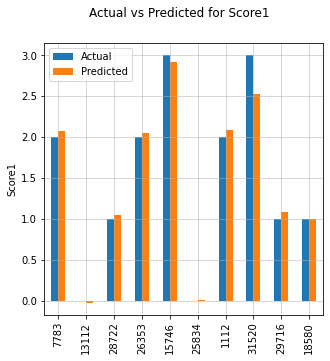

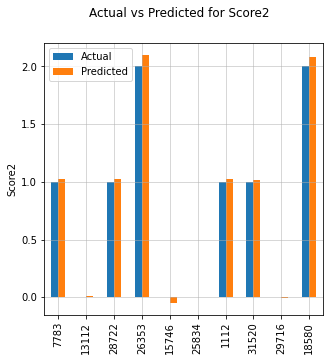

In [32]:
df1.tail(10).plot(kind='bar',figsize=(5, 5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.ylabel('Score1')
plt.suptitle('Actual vs Predicted for Score1')
plt.show()

df2.tail(10).plot(kind='bar',figsize=(5, 5))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.ylabel('Score2')
plt.suptitle('Actual vs Predicted for Score2')
plt.show()

In [33]:
mse= metrics.mean_absolute_error(y1_test, Score1Predict_test)
print("Score1:- ........................")
print("Mean Absolute Error(using only few columns): ")
print(mse)
msse = metrics.mean_squared_error(y1_test, Score1Predict_test)
print("Mean Squared Error(using only few columns):")
print(msse)
smsse = metrics.mean_squared_error(y1_test, Score1Predict_test)
print("Root Mean Squared Error(using only few columns):")
print(msse)

print("Score2:-...................................")
mse= metrics.mean_absolute_error(y2_test, Score2Predict_test)
print("Mean Absolute Error:(using only few columns) ")
print(mse)
msse = metrics.mean_squared_error(y2_test, Score2Predict_test)
print("Mean Squared Error:(using only few columns)")
print(msse)
smsse = metrics.mean_squared_error(y2_test, Score2Predict_test)
print("Root Mean Squared Error:(using only few columns)")
print(msse)

Score1:- ........................
Mean Absolute Error(using only few columns): 
0.10646264205950311
Mean Squared Error(using only few columns):
0.028104961271670573
Root Mean Squared Error(using only few columns):
0.028104961271670573
Score2:-...................................
Mean Absolute Error:(using only few columns) 
0.0743763974166874
Mean Squared Error:(using only few columns)
0.01843603551538786
Root Mean Squared Error:(using only few columns)
0.01843603551538786


The above results shows that I will get almost same result like using all columns as feature if I use only highly correlated and highly un-correlated columns.

CONCLUSION- From the above results, I will get almost similar results as I got using all columns as features, if I use only subset of columns set. This happens because we take into account only necessary features and have removed highly co-related features.